In [9]:
import pandas as pd

df = pd.read_csv("041f01e6-47f4-4ef3-81a8-41b67beeef84.csv", delimiter=";")
df

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,0,0,AMETHYSTS,9998,9,9995.0,23.0,NaN,NaN,10005,23,NaN,NaN,NaN,NaN,10001.5,0.000000
1,0,0,STARFRUIT,5036,23,NaN,NaN,NaN,NaN,5043,23,NaN,NaN,NaN,NaN,5039.5,0.000000
2,0,100,AMETHYSTS,10002,1,10000.0,2.0,9998.0,4.0,10004,1,10005.0,21.0,NaN,NaN,10003.0,0.000000
3,0,100,STARFRUIT,5042,1,5039.0,2.0,5037.0,1.0,5043,22,NaN,NaN,NaN,NaN,5042.5,0.000000
4,0,200,AMETHYSTS,9996,1,9995.0,21.0,NaN,NaN,10004,1,10005.0,21.0,NaN,NaN,10000.0,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,99700,AMETHYSTS,9995,26,NaN,NaN,NaN,NaN,10005,26,NaN,NaN,NaN,NaN,10000.0,1475.000000
1996,0,99800,AMETHYSTS,9996,1,9995.0,25.0,NaN,NaN,10002,5,10004.0,1.0,10005.0,25.0,9999.0,1481.000000
1997,0,99800,STARFRUIT,5051,1,5050.0,25.0,NaN,NaN,5057,26,NaN,NaN,NaN,NaN,5054.0,1265.304688
1998,0,99900,AMETHYSTS,9998,6,9996.0,1.0,9995.0,27.0,10004,1,10005.0,27.0,NaN,NaN,10001.0,1481.000000


In [10]:
columns_to_keep = [col for col in df.columns if col not in ['product', 'timestamp']]

# Pivot the DataFrame
df_pivoted = df.pivot_table(index='timestamp', columns='product', values=columns_to_keep, aggfunc='mean')

# Combine the level names with the product names
df_pivoted.columns = ['_'.join(col).strip() for col in df_pivoted.columns.values]

# Reset the index if you want 'timestamp' back as a column
df_pivoted.reset_index(inplace=True)

# Display the head of the pivoted DataFrame
df_pivoted

,timestamp,ask_price_1_AMETHYSTS,ask_price_1_STARFRUIT,ask_price_2_AMETHYSTS,ask_price_2_STARFRUIT,ask_price_3_AMETHYSTS,ask_price_3_STARFRUIT,ask_volume_1_AMETHYSTS,ask_volume_1_STARFRUIT,ask_volume_2_AMETHYSTS,...,bid_volume_2_AMETHYSTS,bid_volume_2_STARFRUIT,bid_volume_3_AMETHYSTS,bid_volume_3_STARFRUIT,day_AMETHYSTS,day_STARFRUIT,mid_price_AMETHYSTS,mid_price_STARFRUIT,profit_and_loss_AMETHYSTS,profit_and_loss_STARFRUIT
0,0,10005.0,5043.0,NaN,NaN,NaN,NaN,23.0,23.0,NaN,...,23.0,NaN,NaN,NaN,0.0,0.0,10001.5,5039.5,0.0,0.000000
1,100,10004.0,5043.0,10005.0,NaN,NaN,NaN,1.0,22.0,21.0,...,2.0,2.0,4.0,1.0,0.0,0.0,10003.0,5042.5,0.0,0.000000
2,200,10004.0,5043.0,10005.0,5044.0,NaN,NaN,1.0,1.0,21.0,...,21.0,21.0,NaN,NaN,0.0,0.0,10000.0,5040.0,2.0,0.000000
3,300,10005.0,5044.0,NaN,NaN,NaN,NaN,26.0,26.0,NaN,...,NaN,26.0,NaN,NaN,0.0,0.0,10000.0,5043.0,5.0,0.000000
4,400,10004.0,5044.0,10005.0,NaN,NaN,NaN,2.0,28.0,26.0,...,2.0,NaN,26.0,NaN,0.0,0.0,10001.0,5040.5,5.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,99500,9998.0,5056.0,10005.0,NaN,NaN,NaN,3.0,20.0,20.0,...,NaN,NaN,NaN,NaN,0.0,0.0,9996.5,5052.5,1469.0,1226.460938
996,99600,10005.0,5056.0,NaN,NaN,NaN,NaN,28.0,28.0,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,10000.0,5052.5,1475.0,1220.476562
997,99700,10005.0,5057.0,NaN,NaN,NaN,NaN,26.0,26.0,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,10000.0,5053.5,1475.0,1257.218750
998,99800,10002.0,5057.0,10004.0,NaN,10005.0,NaN,5.0,26.0,1.0,...,25.0,25.0,NaN,NaN,0.0,0.0,9999.0,5054.0,1481.0,1265.304688


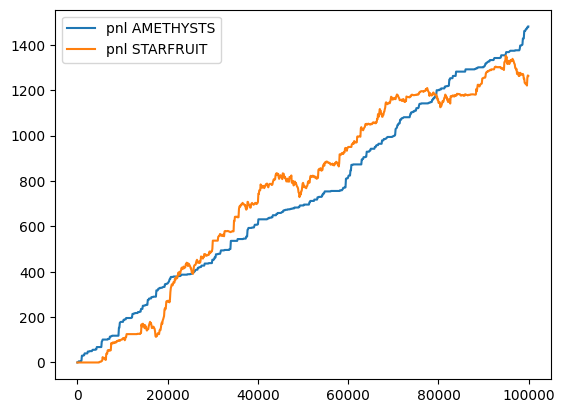

In [11]:
import matplotlib.pyplot as plt
plt.plot(df_pivoted['timestamp'], df_pivoted['profit_and_loss_AMETHYSTS'], label='pnl AMETHYSTS')
plt.plot(df_pivoted['timestamp'], df_pivoted['profit_and_loss_STARFRUIT'], label='pnl STARFRUIT')
plt.legend()